In [1]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv("DATASETS/titanic/train.csv")
test=pd.read_csv("DATASETS/titanic/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train=train.drop(["Name","Ticket"],axis=1)
test=test.drop(["Name","Ticket"],axis=1)

In [6]:
#method to convert into values 
train["Sex"]=train["Sex"].map({"male":0,"female":1})
test["Sex"]=test["Sex"].map({"male":0,"female":1})

test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,0,34.5,0,0,7.8292,NaN,Q
1,893,3,1,47.0,1,0,7.0000,NaN,S
2,894,2,0,62.0,0,0,9.6875,NaN,Q
3,895,3,0,27.0,0,0,8.6625,NaN,S
4,896,3,1,22.0,1,1,12.2875,NaN,S


In [7]:
#method to convert categorical strings to usable int type data
train_embarked = pd.get_dummies(train["Embarked"],prefix="embarked", drop_first=True)
train = pd.concat([train, train_embarked], axis=1)
test_embarked = pd.get_dummies(test["Embarked"],prefix="embarked", drop_first=True)
test = pd.concat([test, test_embarked], axis=1)

In [8]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,embarked_Q,embarked_S
0,1,0,3,0,22.0,1,0,7.2500,NaN,S,0,1
1,2,1,1,1,38.0,1,0,71.2833,C85,C,0,0
2,3,1,3,1,26.0,0,0,7.9250,NaN,S,0,1
3,4,1,1,1,35.0,1,0,53.1000,C123,S,0,1
4,5,0,3,0,35.0,0,0,8.0500,NaN,S,0,1


In [9]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,embarked_Q,embarked_S
0,892,3,0,34.5,0,0,7.8292,NaN,Q,1,0
1,893,3,1,47.0,1,0,7.0000,NaN,S,0,1
2,894,2,0,62.0,0,0,9.6875,NaN,Q,1,0
3,895,3,0,27.0,0,0,8.6625,NaN,S,0,1
4,896,3,1,22.0,1,1,12.2875,NaN,S,0,1


In [10]:
train_pclass = pd.get_dummies(train["Pclass"],prefix="pclass", drop_first=True)
train = pd.concat([train, train_pclass], axis=1)
test_pclass = pd.get_dummies(test["Pclass"],prefix="pclass", drop_first=True)
test = pd.concat([test, test_pclass], axis=1)

In [11]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,embarked_Q,embarked_S,pclass_2,pclass_3
0,1,0,3,0,22.0,1,0,7.2500,NaN,S,0,1,0,1
1,2,1,1,1,38.0,1,0,71.2833,C85,C,0,0,0,0
2,3,1,3,1,26.0,0,0,7.9250,NaN,S,0,1,0,1
3,4,1,1,1,35.0,1,0,53.1000,C123,S,0,1,0,0
4,5,0,3,0,35.0,0,0,8.0500,NaN,S,0,1,0,1


In [12]:
passangerId=test["PassengerId"].values

In [13]:
#dropping non usable colummns
train=train.drop(["Pclass","Embarked","Cabin","PassengerId"],axis=1)
test=test.drop(["Pclass","Embarked","Cabin","PassengerId"],axis=1)

In [14]:
test.head()

,Sex,Age,SibSp,Parch,Fare,embarked_Q,embarked_S,pclass_2,pclass_3
0,0,34.5,0,0,7.8292,1,0,0,1
1,1,47.0,1,0,7.0000,0,1,0,1
2,0,62.0,0,0,9.6875,1,0,1,0
3,0,27.0,0,0,8.6625,0,1,0,1
4,1,22.0,1,1,12.2875,0,1,0,1


In [15]:
train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,embarked_Q,embarked_S,pclass_2,pclass_3
0,0,0,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,1,26.0,0,0,7.9250,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0
4,0,0,35.0,0,0,8.0500,0,1,0,1


In [16]:
train["Age"].value_counts(dropna=False).head()   #counting number of NaN

NaN     177
24.0     30
22.0     27
18.0     26
28.0     25
Name: Age, dtype: int64

In [17]:
#filling na with mean values 
train["Age"]=train["Age"].fillna(train["Age"].mean())

In [18]:
#filling mean with mean value
test=test.fillna(test["Age"].mean())

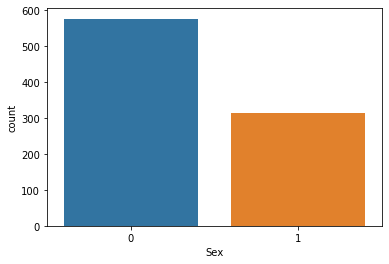

In [19]:
sns.countplot(train["Sex"])

In [20]:
train_y=train["Survived"]
train_x=train.drop("Survived",axis=1)

In [21]:
train_x.head()

,Sex,Age,SibSp,Parch,Fare,embarked_Q,embarked_S,pclass_2,pclass_3
0,0,22.0,1,0,7.2500,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,1
3,1,35.0,1,0,53.1000,0,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,1


In [22]:
test.head()

,Sex,Age,SibSp,Parch,Fare,embarked_Q,embarked_S,pclass_2,pclass_3
0,0,34.5,0,0,7.8292,1,0,0,1
1,1,47.0,1,0,7.0000,0,1,0,1
2,0,62.0,0,0,9.6875,1,0,1,0
3,0,27.0,0,0,8.6625,0,1,0,1
4,1,22.0,1,1,12.2875,0,1,0,1


In [48]:
clf=RandomForestClassifier(n_estimators=5,criterion="gini")

In [49]:
clf.fit(train_x,train_y)
predict_y=clf.predict(test)
print("predicted value:",predict_y)

predicted value: [0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 1]


In [50]:
#uploading predicted data into csv
p_id=pd.Series(passangerId,name="PassengerId")
surv= pd.Series(predict_y,name="Survived")
results = pd.concat([p_id,surv],axis=1)

results.to_csv("survived.csv",index=False)